In [1]:
import pandas as pd
Signupdata = pd.read_csv('/home/mvisi/Project/DLP/Core/FraudPredict/Notebook/Arpan/Signupdataimputed.csv', error_bad_lines=False)

In [8]:
Signupdata.columns

Index(['Fraud_Acc_Flag', 'EIDStatus', 'SanctionStatus', 'Ip_Latitude',
       'Ip_Longitude', 'Ip_Carrier', 'Ip_Connection_type', 'Ip_Line_Speed',
       'Ip_Routing_type', 'IP_Anonymizer_status', 'Fullcontact_Matched',
       'Social_Profiles_Count', 'gender_Fullcontact', 'ageRange_Fullcontact',
       'location_Country_Fullcontact', 'browser_online', 'brwsr_lang',
       'brwsr_type', 'brwsr_version', 'device_manufacturer', 'device_name',
       'device_type', 'device_os_type', 'screen_resolution', 'address_type',
       'aza', 'country_of_residence', 'email_domain', 'region_suburb',
       'residential_status', 'title', 'ad_campaign', 'affiliate_name',
       'branch', 'channel', 'keywords', 'op_country', 'referral_text',
       'reg_mode', 'search_engine', 'source', 'sub_source', 'turnover',
       'txn_value'],
      dtype='object')

In [2]:
#Seperating Dependent and independent variables 
#data_final_Org= data_final.copy()
Signupdata_ML = Signupdata.copy()
X_Signupdata = Signupdata.drop(['Fraud_Acc_Flag'], axis=1, inplace=True)
Y_Signupdata = Signupdata_ML.Fraud_Acc_Flag

In [3]:
Signupdata.head()

,EIDStatus,SanctionStatus,Ip_Latitude,Ip_Longitude,Ip_Carrier,Ip_Connection_type,Ip_Line_Speed,Ip_Routing_type,IP_Anonymizer_status,Fullcontact_Matched,...,channel,keywords,op_country,referral_text,reg_mode,search_engine,source,sub_source,turnover,txn_value
0,0,0,51.511111,-0.040000,0,0,0,0,0,1,...,1,0,0,0,2,0,32,92,0.00,15
1,0,0,52.172000,0.116000,2010,11,1,3,3,1,...,1,0,0,0,2,0,3,121,0.00,170
2,0,0,51.511111,-0.040000,0,0,0,0,0,0,...,0,0,0,0,2,0,3,276,0.00,0
3,0,0,51.511111,-0.040000,0,0,0,0,0,0,...,1,0,0,0,2,0,3,276,113467.12,0
4,0,0,51.858334,-2.218611,6411,1,3,3,3,1,...,1,0,0,0,2,0,40,195,0.00,15


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Signupdata, Y_Signupdata, test_size=0.30, random_state=42)

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainScaler = scaler.fit_transform(X_train)
X_testScaler = scaler.fit_transform(X_test)

In [205]:
X_trainScaler

array([[ 0.        ,  0.        ,  0.52866513, ...,  0.69460274,
        -0.02150941, -0.21754786],
       [ 0.        ,  0.        ,  0.52064089, ...,  0.69460274,
        -0.02159574, -0.21754786],
       [ 0.        ,  0.        ,  0.55358365, ...,  0.69460274,
        -0.02201462,  0.54931445],
       ...,
       [ 0.        ,  0.        ,  0.49700026, ...,  0.69460274,
        -0.02201462, -0.851684  ],
       [ 0.        ,  0.        ,  0.53337446, ..., -0.20875243,
        -0.02201462,  1.74384997],
       [ 0.        ,  0.        ,  0.49654512, ...,  1.33029712,
        -0.02086449,  1.74384997]])

In [5]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [6]:
weights_assigned={0:1,1:493}

In [7]:
print(len(Signupdata.columns))
n_inputs=43

43


In [39]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned, epochs=1000)

Epoch 1/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 1952.9529
Epoch 2/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 1362.8484
Epoch 3/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 1070.3486
Epoch 4/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 1003.7258
Epoch 5/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 1065.9574
Epoch 6/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 620.1974
Epoch 7/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 730.7646
Epoch 8/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 513.1337
Epoch 9/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 599.5714
Epoch 10/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 447.2795
Epoch 11/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 357.7430
Epoch 12/1000
9111/9111 [

9111/9111 [==============================] - 12s 1ms/step - loss: 59.5446
Epoch 187/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 50.6135
Epoch 188/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 53.6108
Epoch 189/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 37.8285
Epoch 190/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 33.9942
Epoch 191/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 48.6887
Epoch 192/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 56.9957
Epoch 193/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 23.2076
Epoch 194/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 32.5585
Epoch 195/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 36.6453
Epoch 196/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 17.6708
Epoch 197/1000
9111/9111 [==========

9111/9111 [==============================] - 12s 1ms/step - loss: 16.9066
Epoch 279/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 33.1028
Epoch 280/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 30.2634
Epoch 281/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 28.2057
Epoch 282/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 11.4556
Epoch 283/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 23.1867
Epoch 284/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 12.1078
Epoch 285/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 19.7417
Epoch 286/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 20.9851
Epoch 287/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 24.4885
Epoch 288/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 19.8937
Epoch 289/1000
9111/9111 [==========

9111/9111 [==============================] - 12s 1ms/step - loss: 32.1346
Epoch 464/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 10.9311
Epoch 465/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 20.8599
Epoch 466/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 17.0021
Epoch 467/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 22.5797
Epoch 468/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 6.7426
Epoch 469/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 12.1841
Epoch 470/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 51.9577
Epoch 471/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 19.7700
Epoch 472/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 13.5782
Epoch 473/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 46.7094
Epoch 474/1000
9111/9111 [===========

9111/9111 [==============================] - 12s 1ms/step - loss: 1.9234
Epoch 649/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 4.3418
Epoch 650/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 6.8200
Epoch 651/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 2.4316
Epoch 652/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 3.0249
Epoch 653/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 1.7573
Epoch 654/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 4.5149
Epoch 655/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 3.1970
Epoch 656/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 2.3812
Epoch 657/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 1.6848
Epoch 658/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 1.3880
Epoch 659/1000
9111/9111 [=====================

9111/9111 [==============================] - 12s 1ms/step - loss: 10.2993
Epoch 835/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 24.1412
Epoch 836/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 27.5846
Epoch 837/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 9.0467
Epoch 838/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 41.6505
Epoch 839/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 37.2306
Epoch 840/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 97.4675
Epoch 841/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 28.8006
Epoch 842/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 20.0809
Epoch 843/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 12.1173
Epoch 844/1000
9111/9111 [==============================] - 12s 1ms/step - loss: 23.5307
Epoch 845/1000
9111/9111 [===========

In [44]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)
print(roc_auc_score(y_test,y_pred1))

0.5076136872330685


In [41]:
y_pred1

array([[0.5167987],
       [0.5167987],
       [0.5167987],
       ...,
       [0.5167987],
       [0.5167987],
       [0.5167987]], dtype=float32)

In [42]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test, y_pred1.round(), normalize=None))
print(accuracy_score(y_test, y_pred1.round(), normalize=False))
print(classification_report(y_test, y_pred1.round()))

[[  2956 121755]
 [     2    235]]
3191
              precision    recall  f1-score   support

           0       1.00      0.02      0.05    124711
           1       0.00      0.99      0.00       237

    accuracy                           0.03    124948
   macro avg       0.50      0.51      0.03    124948
weighted avg       1.00      0.03      0.05    124948



In [49]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org keras-tuner

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 62 kB 9.8 MB/s  eta 0:00:01
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78937 sha256=780002b51f3ce0d4962fe8a324f9303f05ef5a4edab0dda2c609409f0ab71412
  Stored in directory: /home/mvisi/.cache/pip/wheels/f9/42/e3/73f763092b16b23350dbc5b7d9b6220bdbff2944ffcc2c612b
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=342892334156f31f86aac645543009dfbab412bafdac3e073271ec1c27ab648a
  Stored in directory: /home/mvisi/.cache/pip/wheels/86/1b/58/c23af2fe683acd8edc15d5a1268f0242be1ff2cf827fe34737
Successfully built keras-tuner terminaltables
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import kerastuner as kt

In [68]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [207]:
tuner = RandomSearch(
    build_model,
    #objective=kt.Objective("val_recall", direction="max"),#'val_accuracy',
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='Fraud',
    project_name='FraudSignup')

In [70]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [71]:
tuner.search(X_train, y_train,
             epochs=5,
            validation_data=(X_test, y_test))

Trial 4 Complete [00h 10m 01s]
val_accuracy: 0.001896789064630866

Best val_accuracy So Far: 0.001896789064630866
Total elapsed time: 00h 39m 20s
INFO:tensorflow:Oracle triggered exit


In [209]:
#with Scaled Data

tuner.search(X_trainScaler, y_train,
             epochs=10,
            validation_data=(X_testScaler, y_test))

Trial 6 Complete [00h 50m 15s]
val_accuracy: 0.001896789064630866

Best val_accuracy So Far: 0.001896789064630866
Total elapsed time: 11h 36m 31s
INFO:tensorflow:Oracle triggered exit


In [210]:
best_model = tuner.get_best_models(1)[0]

In [211]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]


In [212]:
best_hyperparameters.values

{'num_layers': 15,
 'units_0': 128,
 'units_1': 320,
 'learning_rate': 0.01,
 'units_2': 32,
 'units_3': 32,
 'units_4': 32,
 'units_5': 32,
 'units_6': 32,
 'units_7': 32,
 'units_8': 32,
 'units_9': 32,
 'units_10': 32,
 'units_11': 32,
 'units_12': 32,
 'units_13': 32,
 'units_14': 32}

In [214]:
# define model
modeltuned = Sequential()
# define first hidden layer and visible layer
modeltuned.add(Dense(128, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define second hidden layer and visible layer
modeltuned.add(Dense(320, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define third hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define fourth hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define fifth hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define sixth hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define seventh hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define eighth hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define ninth hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define tenth hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define eleventh hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define twelveth hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define thirteen hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define fourteen hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define fifteen hidden layer and visible layer
modeltuned.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
modeltuned.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
opt = keras.optimizers.Adam(learning_rate=0.01)
modeltuned.compile(loss='binary_crossentropy', optimizer=opt)
modeltuned.fit(X_trainScaler,y_train,class_weight=weights_assigned, epochs=200)

Epoch 1/200
9111/9111 [==============================] - 22s 2ms/step - loss: 32.5889
Epoch 2/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4060
Epoch 3/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4057
Epoch 4/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4091
Epoch 5/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4050
Epoch 6/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4090
Epoch 7/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4078
Epoch 8/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4007
Epoch 9/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4077
Epoch 10/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4065
Epoch 11/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4036
Epoch 12/200
9111/9111 [==============================] - 22s 

9111/9111 [==============================] - 22s 2ms/step - loss: 1.4073
Epoch 191/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4052
Epoch 192/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4066
Epoch 193/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4026
Epoch 194/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4068
Epoch 195/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4075
Epoch 196/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4080
Epoch 197/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4066
Epoch 198/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4088
Epoch 199/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4064
Epoch 200/200
9111/9111 [==============================] - 22s 2ms/step - loss: 1.4081


In [217]:
from sklearn.metrics import roc_auc_score
y_pred2=modeltuned.predict(X_testScaler)
print(roc_auc_score(y_test,y_pred2))

0.5


In [218]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score,classification_report
print(confusion_matrix(y_test, y_pred2.round(), normalize=None))
print(accuracy_score(y_test, y_pred2.round(), normalize=False))
print(classification_report(y_test, y_pred2.round()))

[[     0 124711]
 [     0    237]]
237
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    124711
           1       0.00      1.00      0.00       237

    accuracy                           0.00    124948
   macro avg       0.00      0.50      0.00    124948
weighted avg       0.00      0.00      0.00    124948



/home/mvisi/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
class_weight=dict({0:1,1:0.2}) # Hardcoding and giving 100 times more weight to the less represtend 1 class 
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 0.2})

In [95]:
predRF=classifier.predict(X_test) 
print(confusion_matrix(y_test,predRF)) 
print(accuracy_score(y_test,predRF)) 
print(classification_report(y_test,predRF))


[[124709      2]
 [   229      8]]
0.9981512309120594
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124711
           1       0.80      0.03      0.06       237

    accuracy                           1.00    124948
   macro avg       0.90      0.52      0.53    124948
weighted avg       1.00      1.00      1.00    124948



In [96]:
from collections import Counter
Counter(y_train)

Counter({0: 290937, 1: 606})

In [99]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(1)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

/home/mvisi/.local/lib/python3.6/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 290937, 1: 606})
The number of classes after fit Counter({0: 290937, 1: 290937})


In [100]:
from sklearn.ensemble import RandomForestClassifier
classifieros=RandomForestClassifier()
classifieros.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [101]:
predRF_os=classifieros.predict(X_test) 
print(confusion_matrix(y_test,predRF_os)) 
print(accuracy_score(y_test,predRF_os)) 
print(classification_report(y_test,predRF_os))

[[124702      9]
 [   219     18]]
0.9981752409002145
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124711
           1       0.67      0.08      0.14       237

    accuracy                           1.00    124948
   macro avg       0.83      0.54      0.57    124948
weighted avg       1.00      1.00      1.00    124948



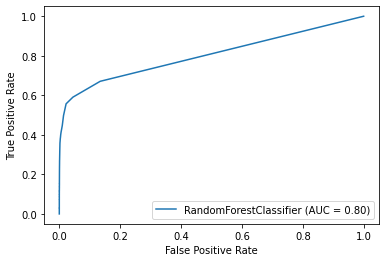

In [102]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifieros, X_test, y_test) 
plt.show()

In [248]:
#Applying XGBoost Classification
import xgboost as xgb
XGBClassifier = xgb.XGBClassifier()
XGBClassifier.fit(X_train_os, y_train_os)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [249]:
predXGB_os=XGBClassifier.predict(X_test) 
print(confusion_matrix(y_test,predXGB_os)) 
print(accuracy_score(y_test,predXGB_os)) 
print(classification_report(y_test,predXGB_os))

[[122879   1832]
 [   127    110]]
0.9843214777347377
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    124711
           1       0.06      0.46      0.10       237

    accuracy                           0.98    124948
   macro avg       0.53      0.72      0.55    124948
weighted avg       1.00      0.98      0.99    124948



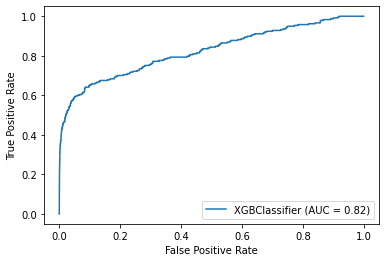

In [105]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(XGBClassifier, X_test, y_test) 
plt.show()

In [107]:
from imblearn.combine import SMOTETomek

sos=SMOTETomek(1)
X_train_sos,y_train_sos=sos.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sos)))

The number of classes before fit Counter({0: 290937, 1: 606})
The number of classes after fit Counter({0: 290910, 1: 290910})


In [108]:
#Applying XGBoost Classification
import xgboost as xgb
XGBClassifier_sos = xgb.XGBClassifier()
XGBClassifier_sos.fit(X_train_sos, y_train_sos)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:49:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
predXGB_sos=XGBClassifier_sos.predict(X_test) 
print(confusion_matrix(y_test,predXGB_sos)) 
print(accuracy_score(y_test,predXGB_sos)) 
print(classification_report(y_test,predXGB_sos))

[[124679     32]
 [   222     15]]
0.9979671543362039
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124711
           1       0.32      0.06      0.11       237

    accuracy                           1.00    124948
   macro avg       0.66      0.53      0.55    124948
weighted avg       1.00      1.00      1.00    124948



# So SMOTETomek is not giving good result in terms of Recall with XGBoost although gave good accuracy

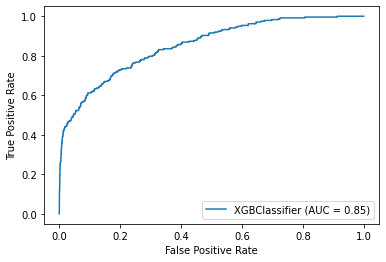

In [110]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(XGBClassifier_sos, X_test, y_test) 
plt.show()

In [116]:
## Hyper Parameter Optimization for XGBoost Classifier

params_os={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "eval_metric"      : ["aucpr"],
"objective"      : ["binary:hinge"]
#"scale_pos_weight"  : [1, 10, 25, 50, 75, 99, 100, 200]
    
}
print (params_os)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7], 'eval_metric': ['aucpr'], 'objective': ['binary:hinge']}


In [117]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [129]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [131]:
#https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
XGBClassifier = xgb.XGBClassifier()
random_searchCV=RandomizedSearchCV(XGBClassifier,param_distributions=params_os,n_iter=7,scoring='f1_macro',n_jobs=-1,#cv=4,
                                 refit=True,cv=cv,
                                 verbose=3)

In [119]:
#https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
#without CV optmization
XGBClassifier = xgb.XGBClassifier()
random_search=RandomizedSearchCV(XGBClassifier,param_distributions=params_os,n_iter=7,scoring='f1_macro',n_jobs=-1,#cv=4,
                                 refit=True,cv=10,
                                 verbose=3)

In [120]:
random_search.fit(X_train_os, y_train_os)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
/home/mvisi/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed: 41.0min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 42.1min finished
/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [132]:
random_searchCV.fit(X_train_os, y_train_os)

Fitting 30 folds for each of 7 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 103.7min finished
/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weigh...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=7, n_jobs=-1,
                   par

In [121]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
random_searchCV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=12, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
XGBClassifier_RandomSearch = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=15, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
XGBClassifier_RandomSearchCV = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=12, min_child_weight=5, 
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [263]:
#Testing which hyperparamter is causing the predict_proba as 1 
XGBClassifier_RandomSearchCVtest = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=12, min_child_weight=5, 
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:logistic', 
                                                 random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [219]:
XGBClassifier_RandomSearch.fit(X_train_os, y_train_os) 

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [264]:
#XGBClassifier_RandomSearchCV.fit(X_train_os, y_train_os) 
XGBClassifier_RandomSearchCVtest.fit(X_train_os, y_train_os) 

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=12, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [221]:
predXGB_RS=XGBClassifier_RandomSearch.predict(X_test) 
print(confusion_matrix(y_test,predXGB_RS)) 
print(accuracy_score(y_test,predXGB_RS)) 
print(classification_report(y_test,predXGB_RS))

[[124576    135]
 [   194     43]]
0.997366904632327
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124711
           1       0.24      0.18      0.21       237

    accuracy                           1.00    124948
   macro avg       0.62      0.59      0.60    124948
weighted avg       1.00      1.00      1.00    124948



In [269]:
predXGB_RSCV=XGBClassifier_RandomSearchCVtest.predict(X_test) 
print(confusion_matrix(y_test,predXGB_RSCV)) 
print(accuracy_score(y_test,predXGB_RSCV)) 
print(classification_report(y_test,predXGB_RSCV))

[[123576   1135]
 [   145     92]]
0.989755738387169
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    124711
           1       0.07      0.39      0.13       237

    accuracy                           0.99    124948
   macro avg       0.54      0.69      0.56    124948
weighted avg       1.00      0.99      0.99    124948



In [233]:
# Checking with SMOTEK and threshold optimization
from sklearn import model_selection, metrics
hardpredtst=XGBClassifier_sos.predict(X_test)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(y_test,hardpredtst)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 124679 (TNR = 99.97%),FP = 32 (FPR = 0.03%)
True 1(Fraud),FN = 222 (FNR = 93.67%),TP = 15 (TPR = 6.33%)


In [234]:
predtstXGBC=XGBClassifier_sos.predict_proba(X_test)[:,1]
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(y_test, predtstXGBC)
    i = np.arange(len(tpr)) 
    # tpr -(1-fpr) is zero near the optimal point
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']),roc

In [270]:
predtstXGBCHPCV=XGBClassifier_RandomSearchCVtest.predict_proba(X_test)[:,1]
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(y_test, predtstXGBCHPCV)
    i = np.arange(len(tpr)) 
    # tpr -(1-fpr) is zero near the optimal point
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']),roc

In [271]:
import numpy as np
from sklearn.metrics import roc_curve
Optimal_Cutoff,roc = Find_Optimal_Cutoff(y_test.values, predtstXGBCHPCV)
print (Optimal_Cutoff)

[0.09858594089746475]


In [272]:
hardpredtst_tuned_threshXGBCHPCV = np.where(predtstXGBCHPCV >= 0.09858594089746475, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_threshXGBCHPCV)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 93662 (TNR = 75.10%),FP = 31049 (FPR = 24.90%)
True 1(Fraud),FN = 59 (FNR = 24.89%),TP = 178 (TPR = 75.11%)


In [235]:
import numpy as np
from sklearn.metrics import roc_curve
Optimal_Cutoff,roc = Find_Optimal_Cutoff(y_test.values, predtstXGBC)
print (Optimal_Cutoff)

[0.0021155301947146654]


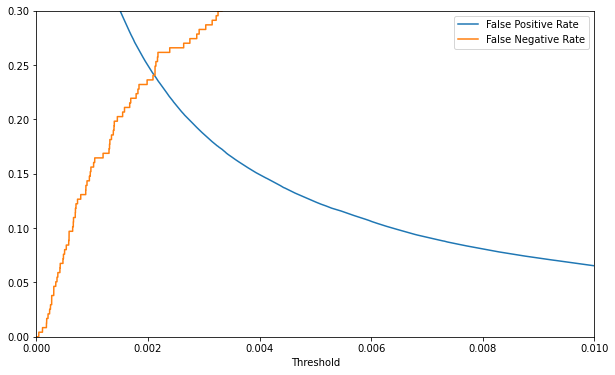

In [240]:
predtstXGBCT=XGBClassifier_sos.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predtstXGBCT)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
#ax.plot([0.0022,0.0022],[0,0.3]) #mark example thresh.
ax.set_xbound(0,0.01); ax.set_ybound(0,0.3) #zoom in

In [246]:
hardpredtst_tuned_threshXGBCSOS = np.where(predtstXGBC >= 0.007600000000000007, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_threshXGBCSOS)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 114148 (TNR = 91.53%),FP = 10563 (FPR = 8.47%)
True 1(Fraud),FN = 101 (FNR = 42.62%),TP = 136 (TPR = 57.38%)


In [ ]:
0.007600000000000007

0.0021155301947146654

In [230]:
predtstXGBC

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [250]:
# Checking with Randomoversampler and threshold optimization
from sklearn import model_selection, metrics
hardpredtstrs=XGBClassifier.predict(X_test)
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(y_test,hardpredtstrs)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 122879 (TNR = 98.53%),FP = 1832 (FPR = 1.47%)
True 1(Fraud),FN = 127 (FNR = 53.59%),TP = 110 (TPR = 46.41%)


In [251]:
predtstXGBCRS=XGBClassifier.predict_proba(X_test)[:,1]
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(y_test, predtstXGBCRS)
    i = np.arange(len(tpr)) 
    # tpr -(1-fpr) is zero near the optimal point
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']),roc

In [252]:
import numpy as np
from sklearn.metrics import roc_curve
Optimal_Cutoff,roc = Find_Optimal_Cutoff(y_test.values, predtstXGBCRS)
print (Optimal_Cutoff)

[0.043136004358530045]


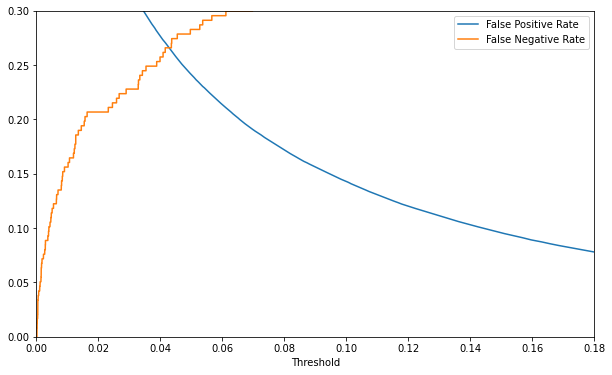

In [258]:
predtstXGBCTRS=XGBClassifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, predtstXGBCTRS)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
#ax.plot([0.0022,0.0022],[0,0.3]) #mark example thresh.
ax.set_xbound(0,0.18
            ); ax.set_ybound(0,0.3) #zoom in

In [259]:
hardpredtst_tuned_threshXGBCRS = np.where(predtstXGBCTRS >= 0.043136004358530045, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_threshXGBCRS)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 91714 (TNR = 73.54%),FP = 32997 (FPR = 26.46%)
True 1(Fraud),FN = 63 (FNR = 26.58%),TP = 174 (TPR = 73.42%)


In [260]:
#0.007600000000000007
hardpredtst_tuned_threshXGBCRS = np.where(predtstXGBCTRS >= 0.007600000000000007, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_threshXGBCRS)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 57482 (TNR = 46.09%),FP = 67229 (FPR = 53.91%)
True 1(Fraud),FN = 32 (FNR = 13.50%),TP = 205 (TPR = 86.50%)


predXGB_RSCV=XGBClassifier_RandomSearchCV.predict(X_test) 
print(confusion_matrix(y_test,predXGB_RSCV)) 
print(accuracy_score(y_test,predXGB_RSCV)) 
print(classification_report(y_test,predXGB_RSCV))

# Cross Validation and hyperparameter tunning is not giving good result compared to normal XGBoost without hyperparameter tunning related to Recall for Fraud but False positive have been reduced considerably

In [144]:
params_os_posw={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "eval_metric"      : ["aucpr"],
"objective"      : ["binary:hinge"],
"scale_pos_weight"  : [1, 10, 25, 50, 75, 99, 100, 200,300,400, 500,600]
    
}
print (params_os_posw)
#"scale_pos_weight"  : [1, 10, 25, 50, 75, 99, 100, 200]

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7], 'eval_metric': ['aucpr'], 'objective': ['binary:hinge'], 'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 200, 300, 400, 500, 600]}


In [145]:
XGBClassifier = xgb.XGBClassifier()
random_searchCVPOSW=RandomizedSearchCV(XGBClassifier,param_distributions=params_os_posw,n_iter=7,scoring='f1_macro',n_jobs=-1,#cv=4,
                                 refit=True,cv=cv,
                                 verbose=3)

In [155]:
XGBClassifier = xgb.XGBClassifier()
random_searchCVPOSW1=RandomizedSearchCV(XGBClassifier,param_distributions=params_os_posw,n_iter=7,scoring='f1_macro',n_jobs=-1,#cv=4,
                                 refit=True,cv=cv,
                                 verbose=3)

In [224]:
#Using Oversample data
random_searchCVPOSW.fit(X_train_os, y_train_os)

Fitting 30 folds for each of 7 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 83.0min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 152.1min finished
/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:24:21] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weigh...
                   n_iter=7, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'eval_metric': ['aucpr'],
                   

In [148]:
random_searchCVPOSW.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=15, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
XGBClassifier_RandomSearchCVPOSW = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=15, min_child_weight=3,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
XGBClassifier_RandomSearchCVPOSW.fit(X_train, y_train)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:57:47] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=15, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
predXGB_RS_POSW=XGBClassifier_RandomSearchCVPOSW.predict(X_test) 
print(confusion_matrix(y_test,predXGB_RS_POSW)) 
print(accuracy_score(y_test,predXGB_RS_POSW)) 
print(classification_report(y_test,predXGB_RS_POSW))

[[124649     62]
 [   209     28]]
0.9978310977366585
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124711
           1       0.31      0.12      0.17       237

    accuracy                           1.00    124948
   macro avg       0.65      0.56      0.59    124948
weighted avg       1.00      1.00      1.00    124948



# Scale_pos_weight did not give good result in terms of Recall for positive 

In [160]:
#Using non-oversample data
random_searchCVPOSW1.fit(X_train, y_train)

Fitting 30 folds for each of 7 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 87.7min finished
/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:01:09] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weigh...
                   n_iter=7, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'eval_metric': ['aucpr'],
                   

In [161]:
random_searchCVPOSW1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=400, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
XGBClassifier_RandomSearchCVPOSW1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=8, min_child_weight=1, 
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=400, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
XGBClassifier_RandomSearchCVPOSW1.fit(X_train, y_train)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:22:52] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=400, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
predXGB_RS_POSW1=XGBClassifier_RandomSearchCVPOSW1.predict(X_test) 
print(confusion_matrix(y_test,predXGB_RS_POSW1)) 
print(accuracy_score(y_test,predXGB_RS_POSW1)) 
print(classification_report(y_test,predXGB_RS_POSW1))

[[124659     52]
 [   204     33]]
0.9979511476774338
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124711
           1       0.39      0.14      0.20       237

    accuracy                           1.00    124948
   macro avg       0.69      0.57      0.60    124948
weighted avg       1.00      1.00      1.00    124948



# Scale_pos_weight did not give good result in terms of Recall for positive in non oversample data but better than oversample data

In [165]:
params_os_mds={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "eval_metric"      : ["aucpr"],
"objective"      : ["binary:hinge"],
"max_delta_step"  : [1, 10, 30, 40, 50, 60, 70]
    
}
print (params_os_mds)
#"scale_pos_weight"  : [1, 10, 25, 50, 75, 99, 100, 200]

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7], 'eval_metric': ['aucpr'], 'objective': ['binary:hinge'], 'max_delta_step': [1, 10, 30, 40, 50, 60, 70]}


In [166]:
XGBClassifier = xgb.XGBClassifier()
random_searchCVMDS=RandomizedSearchCV(XGBClassifier,param_distributions=params_os_mds,n_iter=7,scoring='f1_macro',n_jobs=-1,#cv=4,
                                 refit=True,cv=cv,
                                 verbose=3)

In [167]:
XGBClassifier = xgb.XGBClassifier()
random_searchCVMDS1=RandomizedSearchCV(XGBClassifier,param_distributions=params_os_mds,n_iter=7,scoring='f1_macro',n_jobs=-1,#cv=4,
                                 refit=True,cv=cv,
                                 verbose=3)

In [168]:
#Using Oversample data
random_searchCVMDS.fit(X_train_os, y_train_os)

Fitting 30 folds for each of 7 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 94.1min finished
/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weigh...
                                           verbosity=None),
                   n_iter=7, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                         

In [ ]:
#Using normalsample data
random_searchCVMDS1.fit(X_train, y_train)

In [ ]:
random_searchCVMDS.best_estimator_

In [ ]:
random_searchCVMDS1.best_estimator_

In [ ]:
XGBClassifier_RandomSearchCVMDS = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=15, min_child_weight=3,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
XGBClassifier_RandomSearchCVMDS1 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=15, min_child_weight=3,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [199]:
XGBClassifier_RandomSearchCVMDS.fit(X_train_os, y_train_os)

/home/mvisi/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=40,
              max_depth=10, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
XGBClassifier_RandomSearchCVMDS1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='aucpr',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=60,
              max_depth=15, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [201]:
predXGB_RS_MDS=XGBClassifier_RandomSearchCVMDS.predict(X_test) 
print(confusion_matrix(y_test,predXGB_RS_MDS)) 
print(accuracy_score(y_test,predXGB_RS_MDS)) 
print(classification_report(y_test,predXGB_RS_MDS))

[[124033    678]
 [   162     75]]
0.9932772033165796
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    124711
           1       0.10      0.32      0.15       237

    accuracy                           0.99    124948
   macro avg       0.55      0.66      0.57    124948
weighted avg       1.00      0.99      1.00    124948



In [202]:
predXGB_RS_MDS1=XGBClassifier_RandomSearchCVMDS1.predict(X_test) 
print(confusion_matrix(y_test,predXGB_RS_MDS1)) 
print(accuracy_score(y_test,predXGB_RS_MDS1)) 
print(classification_report(y_test,predXGB_RS_MDS1))

[[124690     21]
 [   210     27]]
0.9981512309120594
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124711
           1       0.56      0.11      0.19       237

    accuracy                           1.00    124948
   macro avg       0.78      0.56      0.59    124948
weighted avg       1.00      1.00      1.00    124948



# max delta step did not give good result in terms of Recall for positive in  normal data but better in oversample data. But non paramater hypertuned XGBoost have the best result till now